This script visualizes the results of a grid search over Berp parameters.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# results_dir = Path("../results/gillis2021/models_berp_grid/berp-fixed/")
# results_dir = Path("../work/2b/cda8e6c76a9235517148309c3afb33/")
results_dir = Path("../work/b6/f943409afa218eade300702170b1d1/")

In [3]:
trial_df_paths = list(results_dir.glob("berp-fixed*2022*/trials.csv"))
trial_dfs = [pd.read_csv(path) for path in trial_df_paths]
trials_df = pd.concat(trial_dfs, keys=trial_df_paths)
trials_df

number     value  \
../work/b6/f943409afa218eade300702170b1d1/berp-... 0         0  0.136314   
                                                   1         1  0.132335   
                                                   2         2  0.130192   
                                                   3         3  0.134181   
                                                   4         4  0.128071   
...                                                        ...       ...   
                                                   495     495  0.136956   
                                                   496     496  0.137245   
                                                   497     497  0.128808   
                                                   498     498  0.137726   
                                                   499     499  0.132042   

                                                                    datetime_start  \
../work/b6/f943409afa218eade300702170b1d1/berp-... 0    2022-10-31 12:56:55.639804   
                                                   1    2022-10-31 13:00:39.866953   
                                                   2    2022-10-31 13:03:02.465561   
                                                   3    2022-10-31 13:05:25.208010   
                                                   4    2022-10-31 13:07:48.110974   
...                                                                            ...   
                                                   495  2022-11-01 20:57:58.840025   
                                                   496  2022-11-01 21:01:39.809555   
                                                   497  2022-11-01 21:05:28.709588   
                                                   498  2022-11-01 21:09:30.426643   
                                                   499  2022-11-01 21:13:24.158026   

                                                                 datetime_complete  \
../work/b6/f943409afa218eade300702170b1d1/berp-... 0    2022-10-31 12:59:18.496980   
                                                   1    2022-10-31 13:03:02.461989   
                                                   2    2022-10-31 13:05:25.202167   
                                                   3    2022-10-31 13:07:48.108713   
                                                   4    2022-10-31 13:10:10.983207   
...                                                                            ...   
                                                   495  2022-11-01 21:01:39.805343   
                                                   496  2022-11-01 21:05:28.706030   
                                                   497  2022-11-01 21:09:30.422906   
                                                   498  2022-11-01 21:13:24.155252   
                                                   499  2022-11-01 21:17:07.262229   

                                                                      duration  \
../work/b6/f943409afa218eade300702170b1d1/berp-... 0    0 days 00:02:22.857176   
                                                   1    0 days 00:02:22.595036   
                                                   2    0 days 00:02:22.736606   
                                                   3    0 days 00:02:22.900703   
                                                   4    0 days 00:02:22.872233   
...                                                                        ...   
                                                   495  0 days 00:03:40.965318   
                                                   496  0 days 00:03:48.896475   
                                                   497  0 days 00:04:01.713318   
                                                   498  0 days 00:03:53.728609   
                                                   499  0 days 00:03:43.104203   

                                                        params_encoder__alpha  \
../work/b6/

In [4]:
param_cols = [c for c in trials_df.columns if c.startswith("params_")]
melted_df = trials_df[["value"] + param_cols].melt(id_vars="value", value_name="param_val")

In [5]:
trials_df.sort_values("value", ascending=False)[param_cols + ["value"]]

params_encoder__alpha  \
../work/b6/f943409afa218eade300702170b1d1/berp-... 481           67027.670487   
                                                   321           64820.601582   
                                                   423           85325.764706   
                                                   198           46445.526765   
                                                   330           70929.580187   
...                                                                       ...   
                                                   311          936982.184020   
                                                   395          930854.787412   
                                                   137          941915.404979   
                                                   329          944719.448253   
                                                   249          994896.318721   

                                                        params_lambda_  \
../work/b6/f943409afa218eade300702170b1d1/berp-... 481        1.538444   
                                                   321        1.517934   
                                                   423        1.949919   
                                                   198        0.525441   
                                                   330        0.421435   
...                                                                ...   
                                                   311        2.263412   
                                                   395        0.839611   
                                                   137        0.922402   
                                                   329        2.620038   
                                                   249        2.426605   

                                                        params_prior_scatter_index  \
../work/b6/f943409afa218eade300702170b1d1/berp-... 481                          -1   
                                                   321                          -1   
                                                   423                          -1   
                                                   198                          -1   
                                                   330                           0   
...                                                                            ...   
                                                   311                          -2   
                                                   395                          -2   
                                                   137                          -1   
                                                   329                          -1   
                                                   249                          -2   

                                                        params_threshold  \
../work/b6/f943409afa218eade300702170b1d1/berp-... 481          0.576311   
                                                   321          0.434629   
                                                   423          0.573845   
                                                   198          0.689539   
                                                   330          0.689055   
...                                                                  ...   
                                                   311          0.537062   
                                                   395          0.909295   
                                                   137          0.867580   
                                                   329          0.880136   
                                                   249          0.535739   

                                                        params_variable_trf_zero_left  \
../work/b6/f943409afa218eade300702170b1d1/berp-... 481                             28   
                                                   321                

In [6]:
log_param_cols = [f"params_{x}" for x in ["encoder__alpha", "encoder__init_scale", "encoder__optim__learning_rate"]]
melted_log_df = melted_df[melted_df.variable.isin(log_param_cols)]
melted_norm_df = melted_df[~melted_df.variable.isin(log_param_cols)]

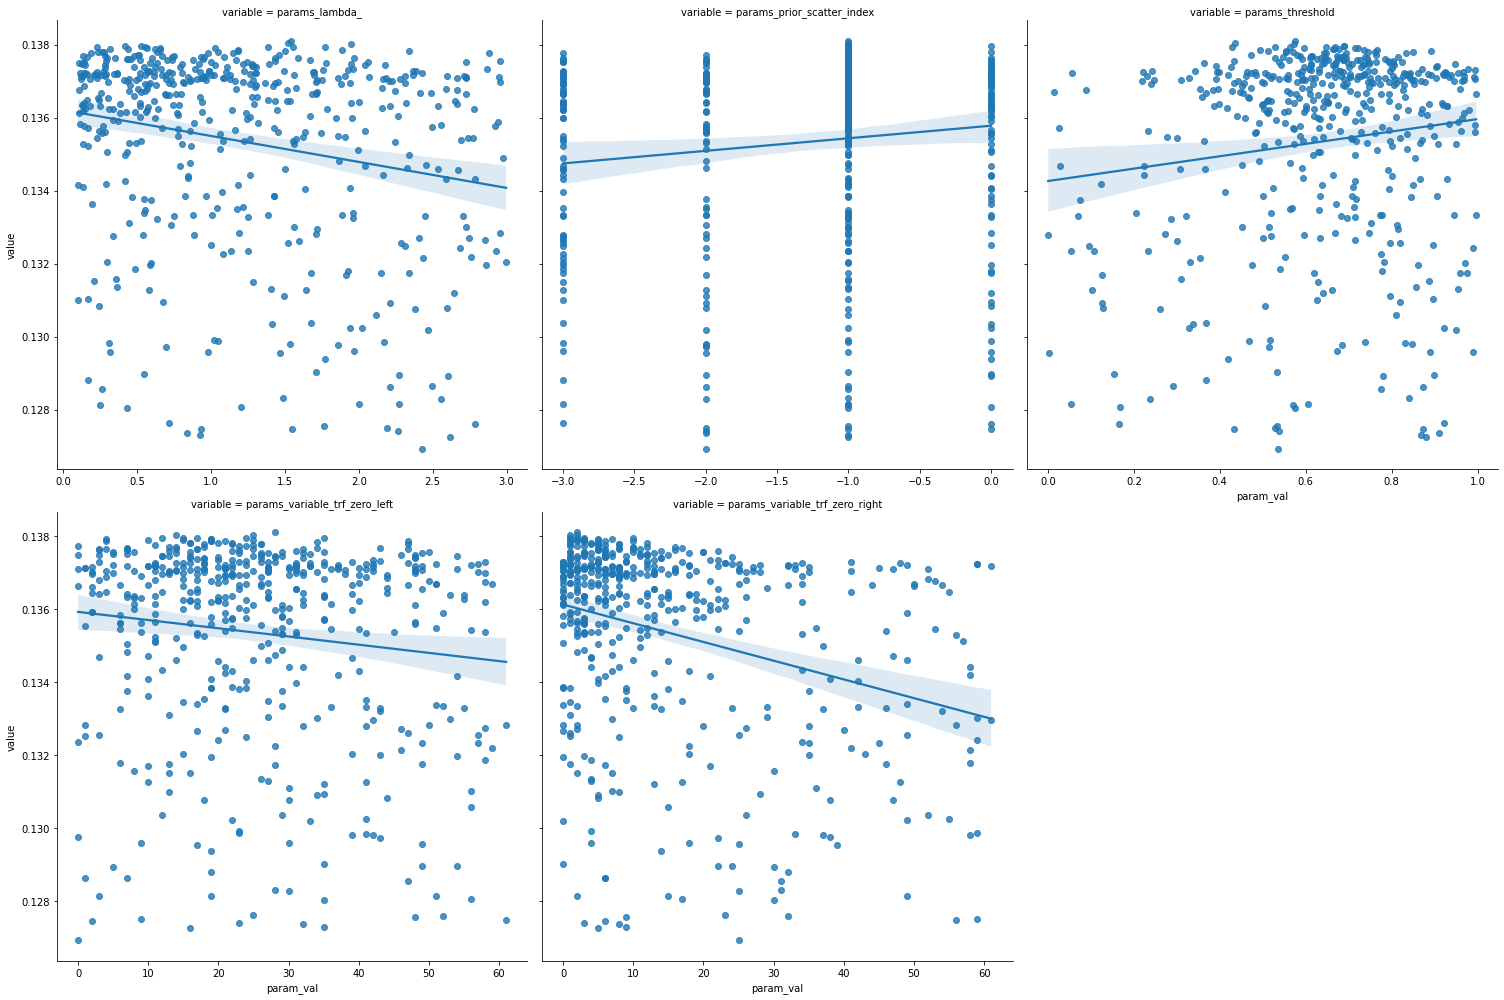

In [7]:
g = sns.FacetGrid(data=melted_norm_df, col="variable", col_wrap=3, sharex=False, sharey=True, height=7)
g.map(sns.regplot, "param_val", "value")

/tmp/ipykernel_53419/3795883258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_log_df["log_param_val"] = np.log10(melted_log_df.param_val)


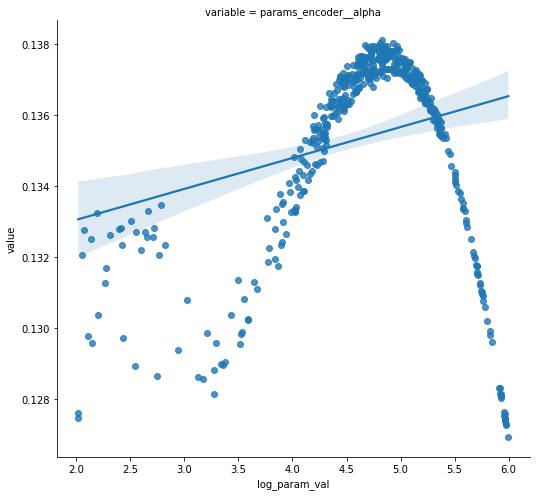

In [8]:
melted_log_df["log_param_val"] = np.log10(melted_log_df.param_val)
g = sns.FacetGrid(data=melted_log_df, col="variable", col_wrap=3, sharex=False, sharey=True, height=7)
g.map(sns.regplot, "log_param_val", "value")

<AxesSubplot:xlabel='params_threshold', ylabel='value'>

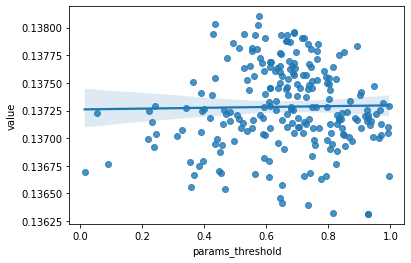

In [9]:
sns.regplot(data=trials_df[(trials_df.params_encoder__alpha > 10 ** 4.5) & (trials_df.params_encoder__alpha < 10 ** 5.2)],
            x="params_threshold", y="value")

In [10]:
trials_df["log_params_encoder__alpha"] = np.log10(trials_df.params_encoder__alpha)

In [11]:
# plt.subplots(figsize=(10, 10))
# sns.kdeplot(data=trials_df[trials_df.value > 0.026], x="params_threshold", y="log_params_encoder__alpha",
#             hue="value")

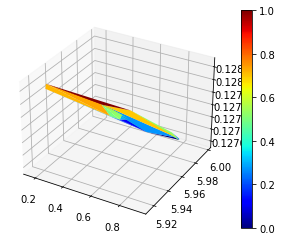

In [12]:
ax = plt.subplot(projection='3d')
cm = plt.cm.ScalarMappable(cmap=plt.cm.jet)
to_plot = trials_df[(trials_df.log_params_encoder__alpha > 5.9) & (trials_df.log_params_encoder__alpha < 6.1)]
ax.plot_trisurf(to_plot.params_threshold, to_plot.log_params_encoder__alpha,
                to_plot.value, cmap=plt.cm.jet)
plt.colorbar(cm, ax=ax)
plt.show()

In [13]:
trials_df["log_params_encoder__alpha_bin"] = pd.qcut(trials_df.log_params_encoder__alpha, q=10)
trials_df["params_threshold_bin"] = pd.qcut(trials_df.params_threshold, 50, labels=False)

<AxesSubplot:xlabel='params_threshold_bin', ylabel='value'>

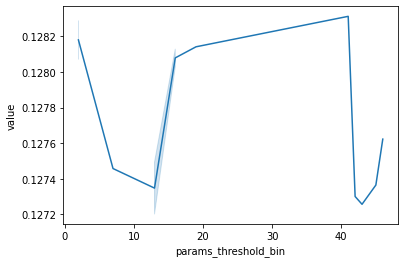

In [14]:
sns.lineplot(data=trials_df[(trials_df.log_params_encoder__alpha > 5.9) & (trials_df.log_params_encoder__alpha < 6.1)],
             x="params_threshold_bin", y="value", errorbar="se")#, hue="log_params_encoder__alpha_bin")